# Cambios en la producción de anime en las últimas cuatro décadas
*Aproximaciones a cambios en las clasificaciones y tipos de producción de anime*

Luciana Arcanjo

# Abstract




En el marco de la exploración de Python como herramienta para la ciencia de datos, el presente trabajo propone un acercamiento a la investigación de la industria del anime, centrándose en el análisis de las producciones y clasificaciones durante las últimas cuatro décadas (1980-2022). El objetivo principal de este estudio es identificar cuál de las variables disponibles en el conjunto de datos es la que más contribuye a predecir la puntuación (Score) de un anime.

Para llevar a cabo este estudio, se utiliza la base de datos "Anime Dataset 2023", disponible en la plataforma Kaggle. Los datos incluyen información detallada sobre diversas dimensiones del anime, como nombre, estado de finalización, productora, género, clasificación, entre otros (https://www.kaggle.com/datasets/dbdmobile/myanimelist-dataset).

Inicialmente, se realizará un análisis exploratorio de los datos para comprender la distribución de las variables clave, identificar posibles valores atípicos y examinar las correlaciones entre diferentes características. Posteriormente, se empleará un modelo de regresión lineal con el fin de analizar cómo diversas características, tales como el número de episodios, la popularidad y el número de miembros que han añadido el anime a sus listas, influyen en la predicción del Score.

Los resultados del modelo permitirán identificar qué variable tiene mayor impacto en la predicción de la puntuación de los animes, lo que contribuirá a comprender mejor las tendencias clave en la evolución de esta industria en las últimas décadas.

#Variables

La base de datos cuenta con 24 columnas, descritas a continuación:

-anime_id: ID único para cada anime

-Name: El nombre del anime en su idioma original.

-English name: El nombre en inglés del anime.

-Other name: Nombre o título nativo del anime (puede estar en japonés, chino o
coreano).

-Score: La puntuación o calificación dada al anime.

-Genres: Los géneros del anime, separados por comas.

-Synopsis: Una breve descripción o resumen de la trama del anime.

-Type: El tipo de anime (por ejemplo, serie de TV, película, OVA, etc.).

-Episodes: El número de episodios del anime.

-Aired: Las fechas en las que se emitió el anime.

-Premiered: La temporada y el año en que se estrenó el anime.

-Status: El estado del anime (por ejemplo, Finalizado, En emisión, etc.).

-Producers: Las compañías de producción o productores del anime.

-Licensors: Los licenciatarios del anime (por ejemplo, plataformas de
streaming).

-Studios: Los estudios de animación que trabajaron en el anime.

-Source: El material de origen del anime (por ejemplo, manga, novela ligera, original).

-Duration: La duración de cada episodio.

-Rating: La clasificación por edad del anime.

-Rank: El rango del anime basado en popularidad u otros criterios.

-Popularity: El rango de popularidad del anime.

-Favorites: El número de veces que los usuarios marcaron el anime como favorito.

-Scored By: El número de usuarios que calificaron el anime.

-Members: El número de miembros que han añadido el anime a su lista en la plataforma.

-Image URL: La URL de la imagen o póster del anime.




#Hipotesis


I. La producción de anime ha cambiado según patrones y tendencias de categorización y tipo en las últimas cuatro décadas  (1980-2022)

II. Existen ciertas variables que tienen un impacto significativamente mayor en la predicción de la puntuación de los animes de las últimas cuatro décadas  (1980-2022)

# Objetivos

I. Investigar los cambios en las categorizaciones y tipos de producciones de anime durante las últimas cuatro décadas (1980-2022).

II. Identificar las variables más influyentes en la predicción de la puntuación (Score) de los animes mediante el uso de técnicas de ciencia de datos y modelos de regresión lineal aplicados a un conjunto de datos históricos de anime.

# Lectura de datos

In [27]:
from google.colab import drive

#EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

#Modelado
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import metrics

#Algoritmos
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor as KNN
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

data = pd.read_csv("https://drive.google.com/uc?export=download&id=1DB9KewIzhGHVwCFD-2XN2c0Iq643nEA8")

In [28]:
#Ver con qué tipo de dato estoy trabajando
data.dtypes

,0
anime_id,int64
Name,object
English name,object
Other name,object
Score,object
Genres,object
Synopsis,object
Type,object
Episodes,object
Aired,object


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24905 entries, 0 to 24904
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   anime_id      24905 non-null  int64 
 1   Name          24905 non-null  object
 2   English name  24905 non-null  object
 3   Other name    24905 non-null  object
 4   Score         24905 non-null  object
 5   Genres        24905 non-null  object
 6   Synopsis      24905 non-null  object
 7   Type          24905 non-null  object
 8   Episodes      24905 non-null  object
 9   Aired         24905 non-null  object
 10  Premiered     24905 non-null  object
 11  Status        24905 non-null  object
 12  Producers     24905 non-null  object
 13  Licensors     24905 non-null  object
 14  Studios       24905 non-null  object
 15  Source        24905 non-null  object
 16  Duration      24905 non-null  object
 17  Rating        24905 non-null  object
 18  Rank          24905 non-null  object
 19  Popu

In [30]:
#Ver cuánta cantidad de información hay
data.shape

(24905, 24)

In [31]:
data.size


597720

In [32]:
#Corroborar que no hayan duplicados
print(sum(data.duplicated()))

0


In [33]:
#Ver las primeras cinco entradas del dataset para ver mejor los datos
print(data.head())

   anime_id                             Name             English name  \
0         1                     Cowboy Bebop             Cowboy Bebop   
1         5  Cowboy Bebop: Tengoku no Tobira  Cowboy Bebop: The Movie   
2         6                           Trigun                   Trigun   
3         7               Witch Hunter Robin       Witch Hunter Robin   
4         8                   Bouken Ou Beet   Beet the Vandel Buster   

                         Other name Score  \
0                         カウボーイビバップ  8.75   
1                    カウボーイビバップ 天国の扉  8.38   
2                             トライガン  8.22   
3  Witch Hunter ROBIN (ウイッチハンターロビン)  7.25   
4                            冒険王ビィト  6.94   

                                 Genres  \
0         Action, Award Winning, Sci-Fi   
1                        Action, Sci-Fi   
2             Action, Adventure, Sci-Fi   
3  Action, Drama, Mystery, Supernatural   
4      Adventure, Fantasy, Supernatural   

                               

# Data Wrangling
Limpieza, transformación y organización de datos

In [34]:
#De las variables de interés que posteriormente convertiré en flotantes, veré cuántos datos se establecen como desconocidos (UNKNOWN) para ver qué decisión puedo tomar en torno a ellos

variablesdesc = ['Score', 'Episodes', 'Rank']
unknown_variables = (data[variablesdesc] == 'UNKNOWN').sum()

print(unknown_variables)

Score       9213
Episodes     611
Rank        4612
dtype: int64


In [35]:
#Dado que las columnas de Score son demasiadas para asignarles un valor cero o eliminalas, voy a asignarles al valor UNKNOWN un valor correspondiente a la mediana del Score
data['Score'] = data['Score'].replace('UNKNOWN', 0)
data['Score'] = data['Score'].astype('float64');
data['Score'] = data['Score'].replace('0', data['Score'].median())

#Por otro lado, los valores de Rank que se presentan como UNKNOWN van a quedar en cero, porque debieran ser valores unicos y son muchos para eliminarlos
data['Rank'] = data['Rank'].replace('UNKNOWN', 0)
data['Rank'] = data['Rank'].astype('float64')

In [36]:
#Reorganizar la columna Aired, para que me de la fecha de inicio y fin de las emisiones en columnas separadas. Voy a hacer Start y End, aunque para el análisis solo voy a ocupar Start
data[['Start', 'End']] = data['Aired'].str.split(' to ', expand=True)

In [37]:
#Conversión a fecha usando mixed
data["Start"] = pd.to_datetime(data["Start"], errors="coerce")
data["End"] = pd.to_datetime(data["End"], errors="coerce")

In [38]:
#Extraer el Año de Start
data["Year"] = data["Start"].dt.year

In [39]:
#Finalmente, voy a eliminar las columnas que no voy a usar para el análisis

data = data.drop(columns=['anime_id', 'Name', 'English name', 'Other name', 'Synopsis', 'Premiered', 'Status',
                          'Producers', 'Licensors', 'Duration', 'Scored By', 'Members', 'Image URL'])

In [40]:
#Ver cómo quedó
print(data.columns)

Index(['Score', 'Genres', 'Type', 'Episodes', 'Aired', 'Studios', 'Source',
       'Rating', 'Rank', 'Popularity', 'Favorites', 'Start', 'End', 'Year'],
      dtype='object')


In [41]:
#Como primera aproximación, voy a agrupar las clasificaciones en torno a los años, para ver si ha habido algún cambio significativo en el público al cual va dirigida la producción de anime
data.groupby(["Year", "Rating"])[("Year")].count()

Year    Rating                        
1917.0  G - All Ages                       12
1918.0  G - All Ages                        8
        UNKNOWN                             1
1926.0  G - All Ages                        1
1927.0  G - All Ages                        2
                                         ... 
2023.0  PG-13 - Teens 13 or older         279
        R - 17+ (violence & profanity)     40
        R+ - Mild Nudity                    5
        Rx - Hentai                        31
        UNKNOWN                            72
Name: Year, Length: 413, dtype: int64

In [42]:
#Para tener una exposición más gráfica de los datos anteriores, voy a filtrar los datos para eliminar los "UNKNOWN" en Ratings
data = data[data["Rating"] != "UNKNOWN"]

#Dada la temporalidad que me interesa estudiar, voy a filtrar para mantener solo el rango 1980 y 2022
data = data[(data["Year"] >= 1980) & (data["Year"] <= 2022)]

#Agrupar los datos por Rating y Year, y contar
rating_counts = data.groupby(["Rating", "Year"])["Rating"].count().unstack(fill_value=0)

In [43]:
#Como me interesa ver los géneros (Genre) de cada anime por separado, voy a crear una nueva columna con los géneros separados en listas
data['Genres_list'] = data['Genres'].str.split(', ')

# Ver los primeros valores
print(data[['Genres', 'Genres_list']].head())

                                 Genres  \
0         Action, Award Winning, Sci-Fi   
1                        Action, Sci-Fi   
2             Action, Adventure, Sci-Fi   
3  Action, Drama, Mystery, Supernatural   
4      Adventure, Fantasy, Supernatural   

                              Genres_list  
0         [Action, Award Winning, Sci-Fi]  
1                        [Action, Sci-Fi]  
2             [Action, Adventure, Sci-Fi]  
3  [Action, Drama, Mystery, Supernatural]  
4      [Adventure, Fantasy, Supernatural]  


In [44]:
# Crear columnas separadas para cada género, llenando con NaN si hay menos géneros
genres_data = data['Genres'].str.split(', ', expand=True)

# Unir las columnas originales con las nuevas de géneros separados
data = pd.concat([data, genres_data], axis=1)
print(data.head())

   Score                                Genres   Type Episodes  \
0   8.75         Action, Award Winning, Sci-Fi     TV     26.0   
1   8.38                        Action, Sci-Fi  Movie      1.0   
2   8.22             Action, Adventure, Sci-Fi     TV     26.0   
3   7.25  Action, Drama, Mystery, Supernatural     TV     26.0   
4   6.94      Adventure, Fantasy, Supernatural     TV     52.0   

                          Aired         Studios    Source  \
0   Apr 3, 1998 to Apr 24, 1999         Sunrise  Original   
1                   Sep 1, 2001           Bones  Original   
2   Apr 1, 1998 to Sep 30, 1998        Madhouse     Manga   
3   Jul 3, 2002 to Dec 25, 2002         Sunrise  Original   
4  Sep 30, 2004 to Sep 29, 2005  Toei Animation     Manga   

                           Rating    Rank  Popularity  ...  \
0  R - 17+ (violence & profanity)    41.0          43  ...   
1  R - 17+ (violence & profanity)   189.0         602  ...   
2       PG-13 - Teens 13 or older   328.0         

#EDA: Análisis Exploratorio de datos

Para responder a si la producción de anime ha experimentado cambios en torno a sus categorías en las últimas cuatro décadas (1980-2022). Voy a elaborar un gráfico de torta para ver el panorama general de las categorías (Ratings) de la producción de anime

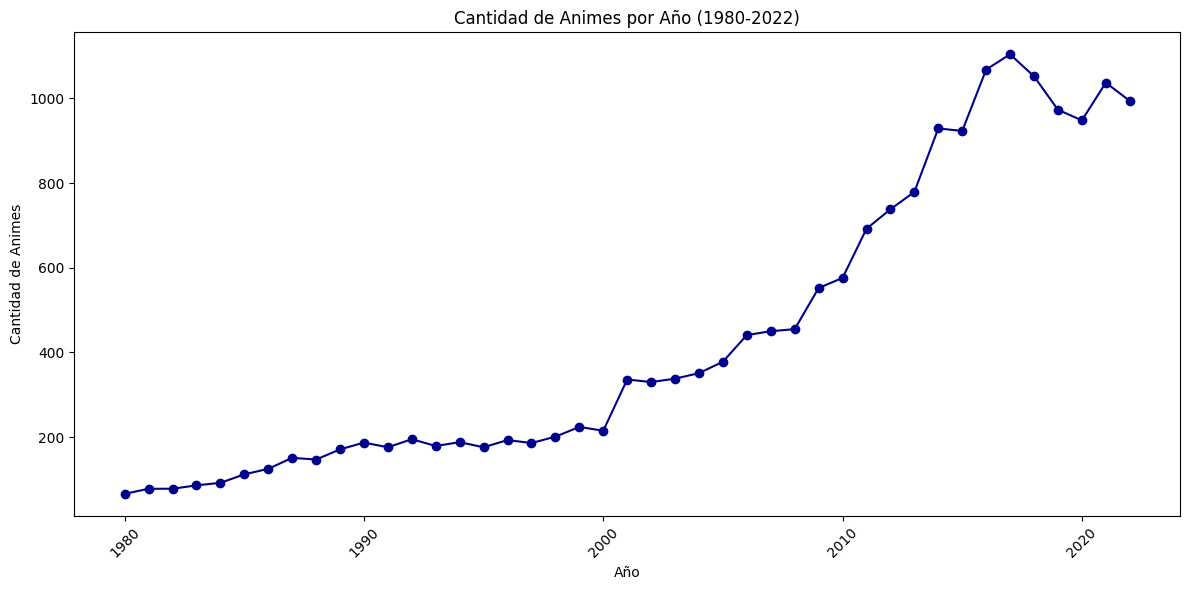

In [45]:
# Empiezo por contar la cantidad de animes por año
anime_count_per_year = data['Year'].value_counts().sort_index()

# Graficar
plt.figure(figsize=(12, 6))
plt.plot(anime_count_per_year.index, anime_count_per_year.values, marker='o', color='darkblue')

# Etiquetas y título
plt.xlabel('Año')
plt.ylabel('Cantidad de Animes')
plt.title('Cantidad de Animes por Año (1980-2022)')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

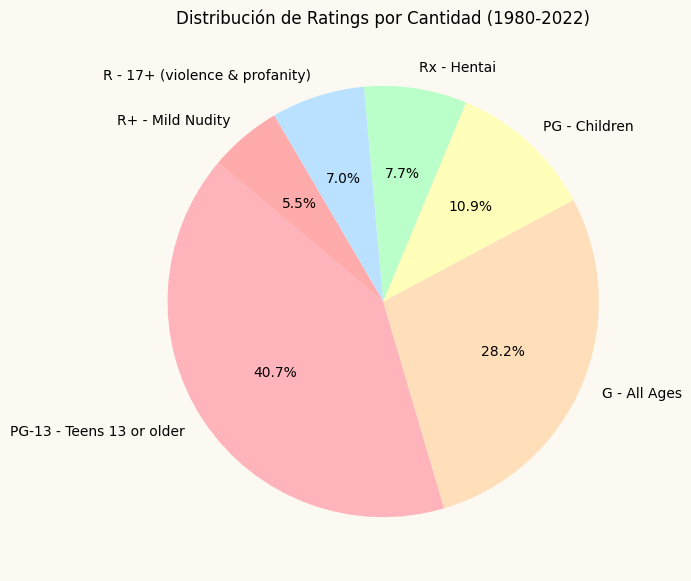

In [46]:
# Contar los ratings
rating_count = data['Rating'].value_counts()

# Definir una paleta de colores pastel
pastel_colors = ['#FFB3BA', '#FFDFBA', '#FFFFBA', '#BAFFC9', '#BAE1FF', '#FFABAB']

# Elaboro gráfico de torta
plt.figure(figsize=(10, 7))
plt.gcf().set_facecolor('#FCF9F2')  # Cambiar el fondo
plt.pie(rating_count, labels=rating_count.index, autopct='%1.1f%%', startangle=140, colors=pastel_colors)
plt.title('Distribución de Ratings por Cantidad (1980-2022)')
plt.show()

En el gráfico anterior queda expuesto que la gran mayoría de las producciones de anime entre los años 1980 y 2022 van dirigidas a un público general u adolescente (G y PG13), seguido de un público adulto (R17, Rx y R+) y, finalmente, aquellos de contenido infantil (PG)

<Figure size 1400x700 with 0 Axes>

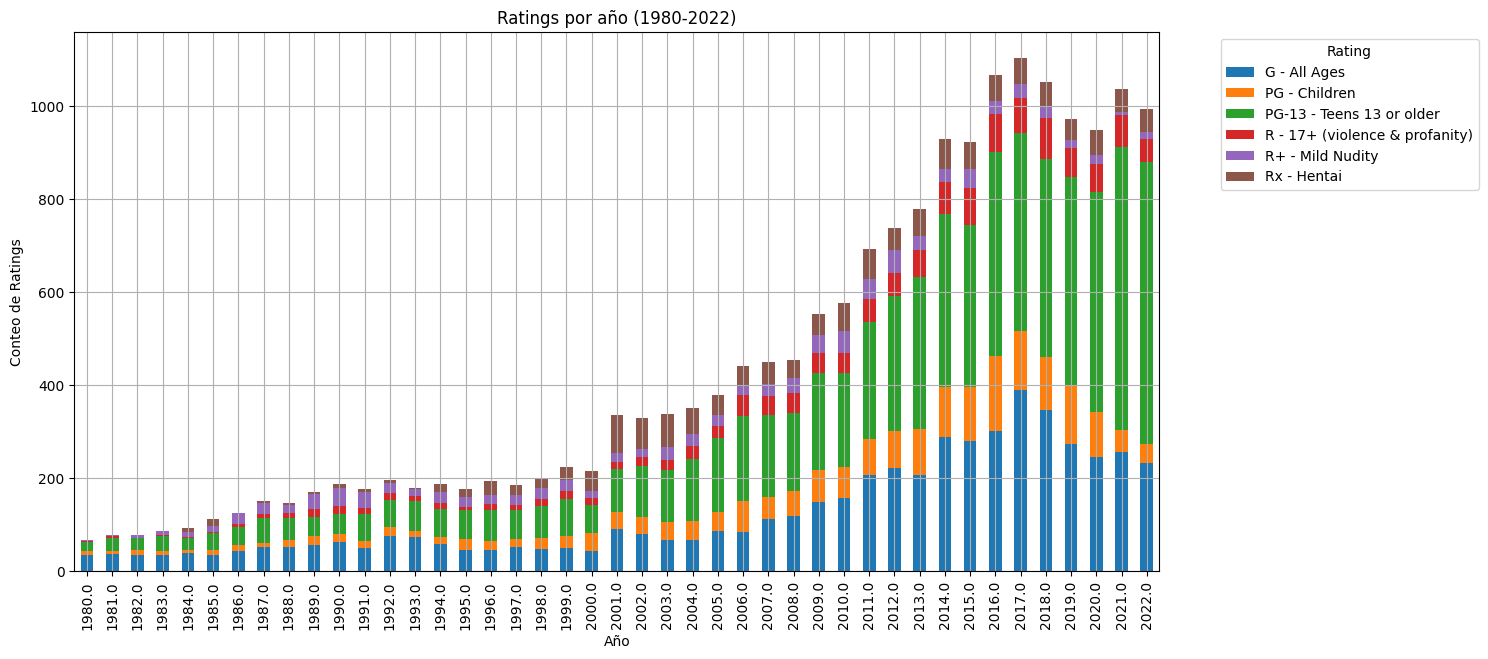

In [47]:
#Para entender cómo dichas categorizaciones han ido cambiando durante los años, voy a elaborar un gráfico de barras
plt.figure(figsize=(14, 7))
rating_counts.T.plot(kind='bar', stacked=True, figsize=(14, 7))

plt.xlabel("Año")
plt.ylabel("Conteo de Ratings")
plt.title("Ratings por año (1980-2022)")
plt.legend(title="Rating", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

En el gráfico anterior, puede verse que la producción de anime y la diversidad de sus géneros han experimentado un aumento sostenido a lo largo de los años. Este crecimiento se ha evidenciado con saltos significativos en los años 2001, 2011, 2014 y 2016. Sin embargo, el periodo entre 2016 y 2020 se caracteriza por un decrecimiento notable en la producción, lo cual podría atribuirse a diversos factores, como la saturación del mercado, cambios en las preferencias del público, y la influencia de plataformas de streaming que han modificado la forma en que los espectadores consumen anime. Este declive plantea interrogantes sobre las dinámicas actuales de la industria y su capacidad para adaptarse a un entorno en constante evolución.

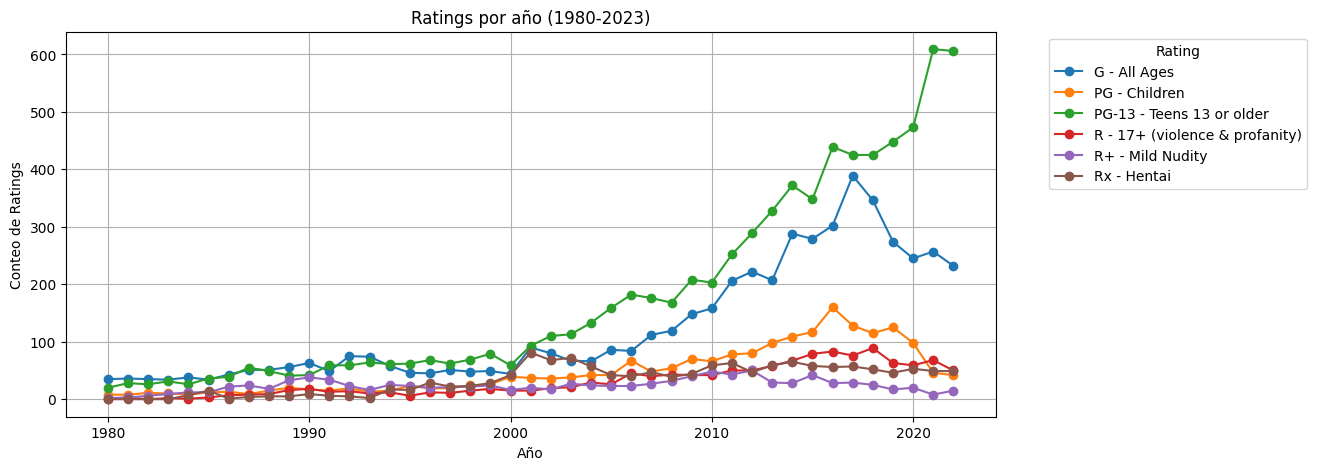

In [48]:
#Para practicar, voy a hacer lo mismo, pero en Gráfico de líneas
plt.figure(figsize=(12, 5))

for rating in rating_counts.index:
    plt.plot(rating_counts.columns, rating_counts.loc[rating], marker='o', label=rating)

plt.xlabel("Año")
plt.ylabel("Conteo de Ratings")
plt.title("Ratings por año (1980-2023)")
plt.legend(title="Rating", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

En ambos gráficos puede verse un incremento sustancial en la producción de anime desde inicios de la década del 2000. Esto puede venir dado por la proliferación de técnicas digitales en la animación, que vinieron a abaratar los costos de producción y mermaron la mano de obra necesaria. Pero para ahondar en ello se necesitaría un análisis más profundo.

Otro aspecto que me interesa abarcar, es el formato (Type) en el cual los animes fueron producidos durante aquellas décadas, y si se presentó algún cambio significativo a través del tiempo.

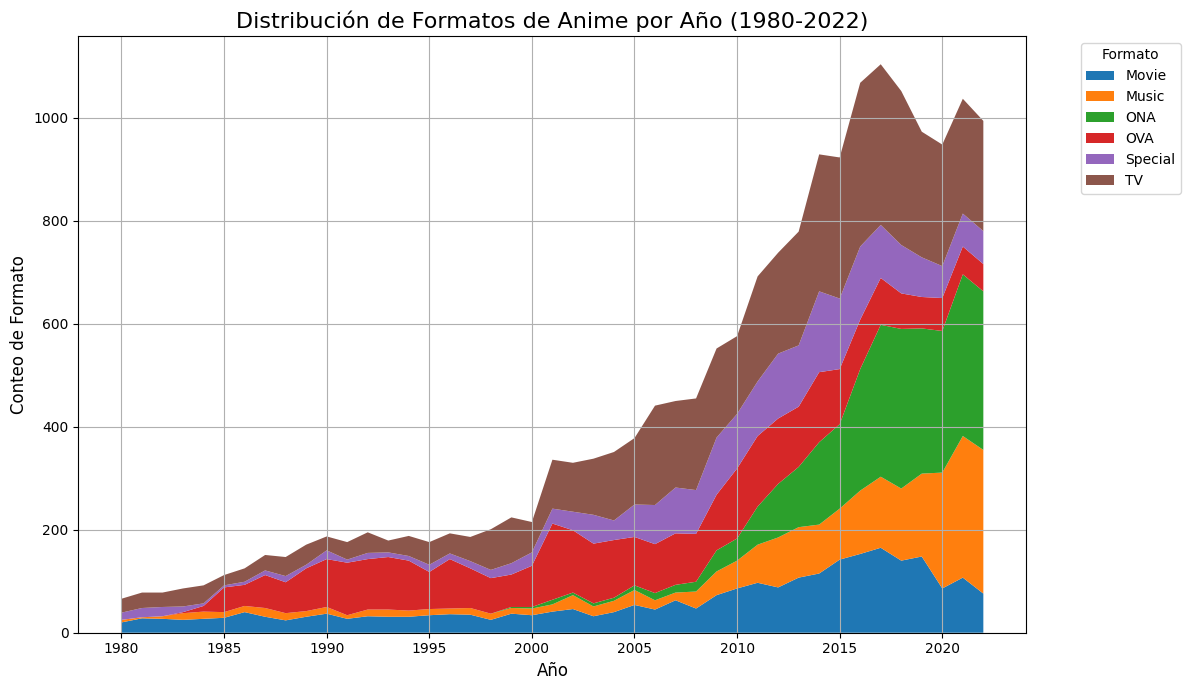

In [49]:
# Agrupar los datos por 'Type' y 'Year'
type_count = data.groupby(["Type", "Year"])["Type"].count().unstack(fill_value=0)

# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(12, 7))

# Gráfico de áreas apiladas
ax.stackplot(type_count.columns, type_count, labels=type_count.index)

# Etiquetas
ax.set_xlabel("Año", fontsize=12)
ax.set_ylabel("Conteo de Formato", fontsize=12)
ax.set_title("Distribución de Formatos de Anime por Año (1980-2022)", fontsize=16)

# Convertir los valores de las columnas a enteros para eliminar el '.0'
years = [int(year) for year in type_count.columns]

# Modificar las etiquetas del eje X para que sean cada 5 años
tick_years = list(range(min(years), max(years)+1, 5))
ax.set_xticks(tick_years)
ax.set_xticklabels([str(year) for year in tick_years])

# Añadir la leyenda y las líneas de fondo (grilla)
ax.legend(title="Formato", bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(True)

# Ajustar el diseño
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [50]:
#Aparición del ONA (Original Net Animation) en potencial reemplazo del OVA (Original Video Animation). Tiene sentido debido a los avances en digitalización y servicios de streaming, pero para ahondar se necesitarían más datos

<ipython-input-51-43b76fd4db08>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')


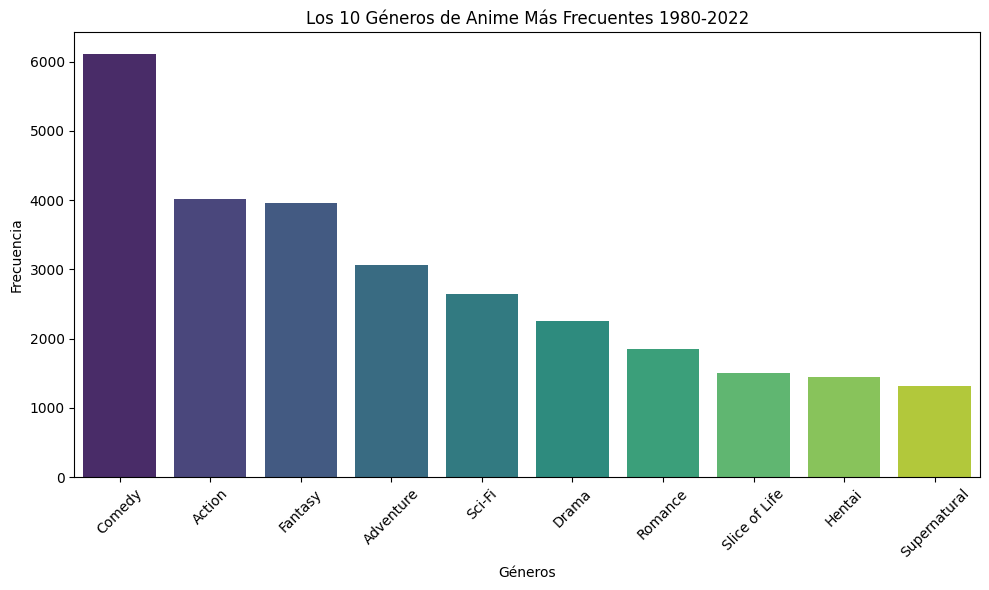

In [51]:
#Ahora quiero ver los 10 géneros más populares de las producciones de anime. Para el análisis, no hay que olvidar que la mayoría de estos animes poseen múltiples géneros

# Seleccionar solo las columnas tipo STRING en GENRES
genre_columns = [col for col in data.columns if isinstance(col, str) and col.startswith('Genres')]

# Combinar todas las columnas de géneros en una sola serie, eliminando los NaN y separar los géneros que están combinados por comas
genres_combined = pd.concat([data[col].dropna().str.split(',').explode() for col in genre_columns])

# Eliminar espacios en blanco
genres_combined = genres_combined.str.strip()

# Filtrar y eliminar el género 'UNKNOWN'
genres_combined = genres_combined[genres_combined != 'UNKNOWN']

# Contar la frecuencia de cada género y tomar solo los 10 más frecuentes
genre_counts = genres_combined.value_counts().head(10)

# Crear el gráfico de barras con sns
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')

# Añadir etiquetas y título
plt.xlabel('Géneros')
plt.ylabel('Frecuencia')
plt.title('Los 10 Géneros de Anime Más Frecuentes 1980-2022')
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

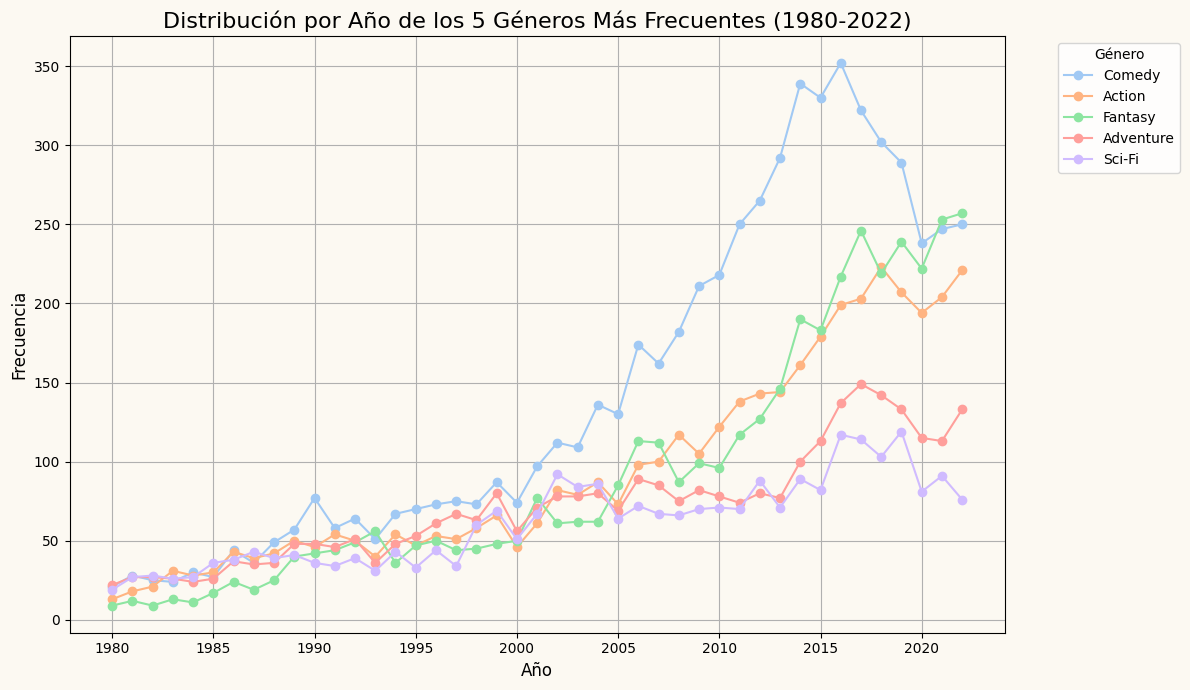

In [52]:
# Combinar todas las columnas de géneros en una sola serie y asociarlas con su año correspondiente
genres_combined = pd.concat([data[['Year', col]].dropna().assign(Genre=data[col].str.split(',')).explode('Genre') for col in genre_columns])

# Eliminar espacios en blanco y el género 'UNKNOWN'
genres_combined['Genre'] = genres_combined['Genre'].str.strip()
genres_combined = genres_combined[genres_combined['Genre'] != 'UNKNOWN']

# Contar la frecuencia de cada género por año
genre_year_counts = genres_combined.groupby(['Year', 'Genre']).size().unstack(fill_value=0)

# Sacar los 5 géneros más frecuentes
top_5_genres = genres_combined['Genre'].value_counts().head(5).index

# Filtrar solo los géneros más frecuentes
genre_year_counts = genre_year_counts[top_5_genres]

# Crear una paleta de colores pasteles
pastel_palette = sns.color_palette("pastel", n_colors=len(top_5_genres))

# Configurar el fondo del gráfico
plt.figure(figsize=(12, 7), facecolor='#FCF9F2')
ax = plt.gca()
ax.set_facecolor('#FCF9F2')  # Establecer el color de fondo

# Graficar los 5 géneros más frecuentes a lo largo de los años
for i, genre in enumerate(top_5_genres):
    plt.plot(genre_year_counts.index, genre_year_counts[genre], marker='o', label=genre, color=pastel_palette[i])

# Etiquetas y título
plt.xlabel('Año', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.title('Distribución por Año de los 5 Géneros Más Frecuentes (1980-2022)', fontsize=16)

# Convertir los valores de los años a enteros para eliminar el '.0'
years = genre_year_counts.index.astype(int)

# Modificar las etiquetas del eje X para eliminar el '.0', mostrando cada 5 años
tick_years = list(range(years.min(), years.max()+1, 5))
ax.set_xticks(tick_years)
ax.set_xticklabels([str(year) for year in tick_years])

# Añadir la leyenda con colores pasteles
plt.legend(title="Género", bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar la grilla
plt.grid(True)

# Ajustar el diseño
plt.tight_layout()

# Mostrar el gráfico
plt.show()

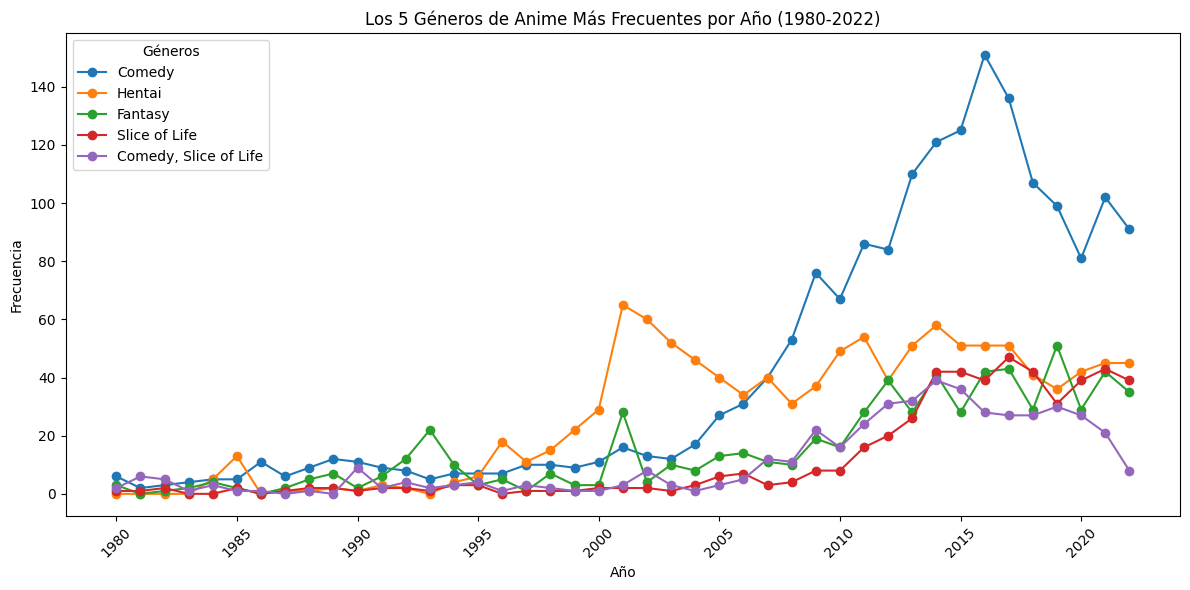

In [53]:
# Voy a hacer un gráfico de líneas para ver los géneros más frecuentes por año, pero voy a reducirlo al top 5 para que sea visualmente más atractivo
# Filtrar los generos de UNKNOWN
filtered_data = data[~data['Genres'].str.contains('UNKNOWN', na=False)]
# Sacar los 5 géneros más frecuentes
top_5_genres = filtered_data['Genres'].value_counts().head(5).index
# Contar la frecuencia de cada género por año
genre_year_counts = filtered_data.groupby(['Year', 'Genres']).size().unstack(fill_value=0)

# Graficar
plt.figure(figsize=(12, 6))
for genre in top_5_genres:
    plt.plot(genre_year_counts.index, genre_year_counts[genre], marker='o', label=genre)
plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.title('Los 5 Géneros de Anime Más Frecuentes por Año (1980-2022)')
plt.xticks(rotation=45)

# Hacer los rangos de cada 5 años
plt.xticks(ticks=range(1980, 2023, 5))
plt.legend(title='Géneros')

# Ajustar
plt.tight_layout()
plt.show()

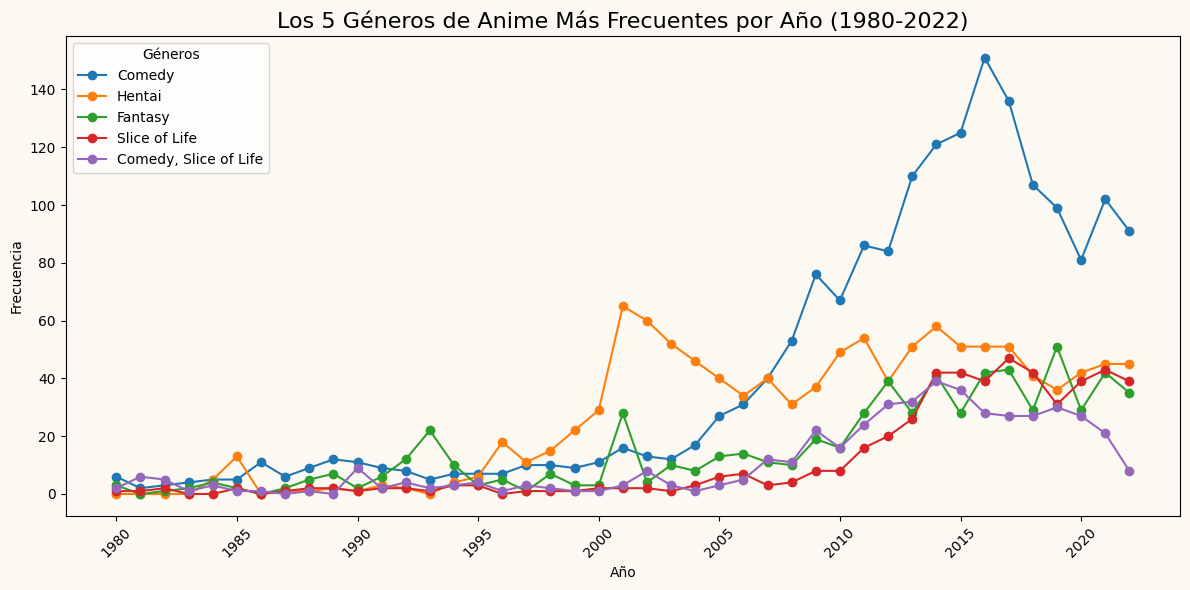

In [54]:
# Filtrar los géneros de UNKNOWN
filtered_data = data[~data['Genres'].str.contains('UNKNOWN', na=False)]

# Sacar los 5 géneros más frecuentes
top_5_genres = filtered_data['Genres'].value_counts().head(5).index

# Contar la frecuencia de cada género por año
genre_year_counts = filtered_data.groupby(['Year', 'Genres']).size().unstack(fill_value=0)

# Definir una paleta de colores pasteles
pastel_palette = sns.color_palette("pastel")

# Graficar
plt.figure(figsize=(12, 6), facecolor='#FCF9F2')  # Configurar el fondo
ax = plt.gca()  # Obtener el objeto de los ejes actuales
ax.set_facecolor('#FCF9F2')  # Establecer el color de fondo del gráfico

for genre in top_5_genres:
    plt.plot(genre_year_counts.index, genre_year_counts[genre], marker='o', label=genre)

# Etiquetas y título
plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.title('Los 5 Géneros de Anime Más Frecuentes por Año (1980-2022)', fontsize=16)
plt.xticks(rotation=45)

# Hacer los rangos de cada 5 años
plt.xticks(ticks=range(1980, 2023, 5))
plt.legend(title='Géneros')

# Ajustar diseño para evitar superposición
plt.tight_layout()

# Mostrar el gráfico
plt.show()

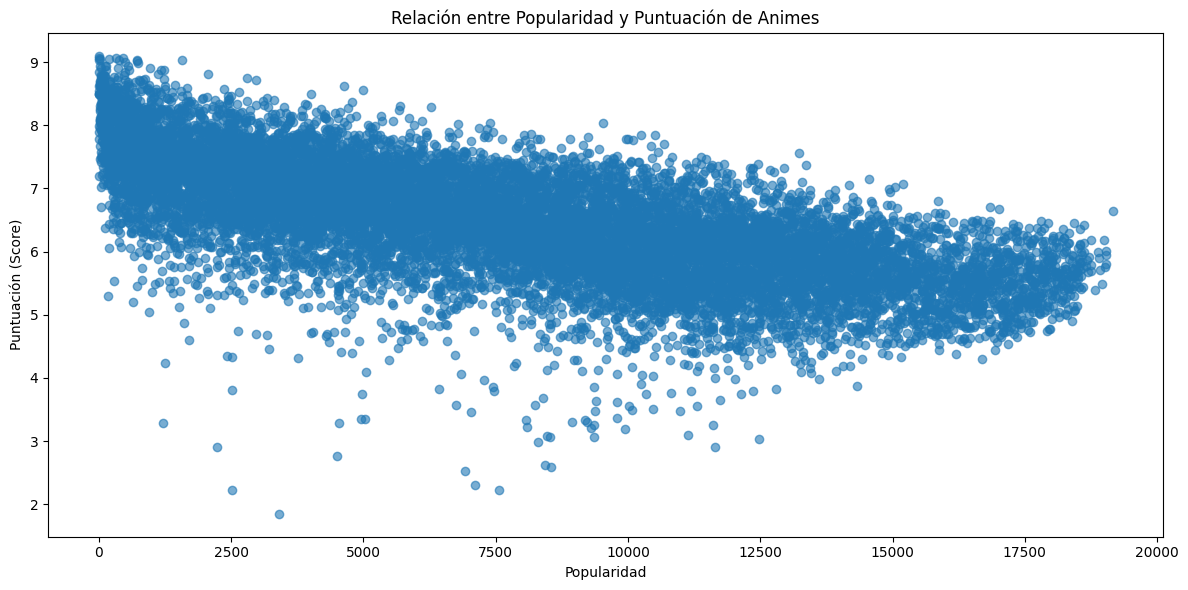

In [55]:
#Ahora voy a elaborar un grafico de dispersión para ver si hay relación entre la popularidad de un anime y su puntuación
# Asegurar que no hayan valores NaN en las columnas 'Popularity' y 'Score', y filtrar Score de 0
filtered_data = data[['Popularity', 'Score']].dropna()
filtered_data = filtered_data[filtered_data['Score'] > 0]

# Crear el gráfico
plt.figure(figsize=(12, 6))
plt.scatter(filtered_data['Popularity'], filtered_data['Score'], alpha=0.6)
# Etiquetas y títulos
plt.xlabel('Popularidad')
plt.ylabel('Puntuación (Score)')
plt.title('Relación entre Popularidad y Puntuación de Animes')
plt.tight_layout()

plt.show()

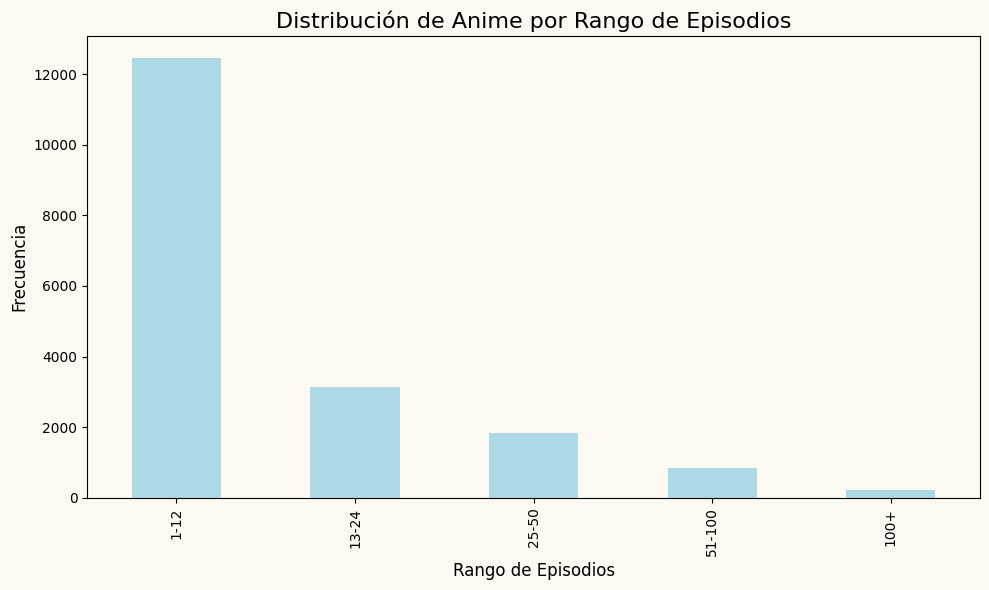

In [58]:
# Convertir 'Episodes' a valores numéricos, y los errores a NaN
data['Episodes'] = pd.to_numeric(data['Episodes'], errors='coerce')

# Definir los rangos
bins = [0, 12, 24, 50, 100, float('inf')]
labels = ['1-12', '13-24', '25-50', '51-100', '100+']

# Crear la nueva columna
data['Episodes Range'] = pd.cut(data['Episodes'], bins=bins, labels=labels, right=False)

# Contar la frecuencia de cada rango
episode_range_counts = data['Episodes Range'].value_counts().sort_index()

# Graficar
plt.figure(figsize=(10, 6), facecolor='#FCF9F2')
ax = plt.gca()
ax.set_facecolor('#FCF9F2')
episode_range_counts.plot(kind='bar', color='lightblue')
plt.xlabel('Rango de Episodios', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.title('Distribución de Anime por Rango de Episodios', fontsize=16)
plt.tight_layout()

plt.show()

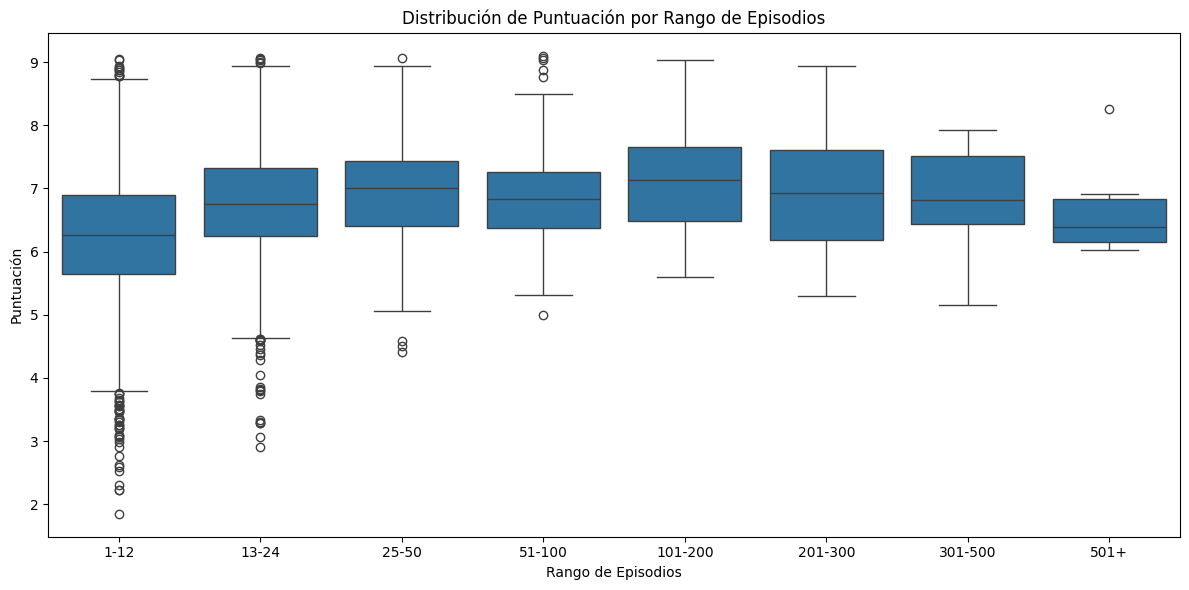

In [59]:
# Para poder ver si la puntuación de un anime se relaciona con la cantidad de episodios que tiene, voy a hacer un gráfico de boxplot

# Filtrar filas con NaN en 'Episodes' y convertir 'Episodes' a numérico
data['Episodes'] = pd.to_numeric(data['Episodes'], errors='coerce')  # Convertir a numérico y forzar NaN en errores
filtered_data = data[['Episodes', 'Score']].dropna()
filtered_data = filtered_data[filtered_data['Score'] > 0]

# Crear categorías para los episodios haciendo rangos, porque hay animes de demasiados capitulos
bins = [0, 12, 24, 50, 100, 200, 300, 500, 1000]
labels = ['1-12', '13-24', '25-50', '51-100', '101-200', '201-300', '301-500', '501+']
filtered_data['Episodes_Category'] = pd.cut(filtered_data['Episodes'], bins=bins, labels=labels, right=False)

# Restablecer el índice para evitar duplicados
filtered_data.reset_index(drop=True, inplace=True)

# Graficar
plt.figure(figsize=(12, 6))
sns.boxplot(x='Episodes_Category', y='Score', data=filtered_data)
plt.xlabel('Rango de Episodios')
plt.ylabel('Puntuación')
plt.title('Distribución de Puntuación por Rango de Episodios')
plt.tight_layout()

plt.show()
